# ACCIDENT LIKELIHOOD ESTIMATION USING MAMDANI FUZZY INFERENCE SYSTEM

## Installing required modules

In [2]:
%pip install -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.


## Importing Necessary Modules

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Creation of Universes

In [2]:
# Define ranges and categories for inputs and outputs
# a[0] is ranges, a[1] is categories, a[2] is increment factor
traffic_density_data = [[[0, 10], [11, 25], [26, 40], [41, 50]], ["Light", "Moderate", "Heavy", "Very Heavy"], 1]
driver_speed_data = [[[0, 50], [51, 80], [81, 100], [101, 150]], ["Slow", "Moderate", "Fast", "Very Fast"], 1]
rainfall_intensity_data = [[[0.1, 2.5], [2.6, 7.5], [7.6, 15], [15.1, 20]], ["Light Rain", "Moderate Rain", "Heavy Rain", "Very Heavy Rain"], 0.1]
time_of_day_data = [[[0, 299], [300, 719], [720, 1019], [1020, 1259], [1260, 1439]], ["Overnight", "Morning", "Afternoon", "Evening", "Night"], 1]
accident_likelihood_data = [[[0, 5], [5.1, 7], [7.1, 15], [15.1, 50], [50.1, 70], [70.1, 87], [87.1, 100]], ["Super Low", "Very Low", "Low", "Medium", "High", "Very High", "Super High"], 0.1]

# Define universes 
traffic_density_universe = np.arange(0, 51, traffic_density_data[-1])
driver_speed_universe = np.arange(0, 151, driver_speed_data[-1])
rainfall_intensity_universe = np.arange(0, 20.1, rainfall_intensity_data[-1])
time_of_day_universe = np.arange(0, 1440, time_of_day_data[-1])
accident_likelihood_universe = np.arange(0, 100.1, accident_likelihood_data[-1])

## Fuzzy Membership Functions

In [48]:
# Define fuzzy membership functions for Traffic Density
traffic_light = fuzz.trapmf(traffic_density_universe, [0, 0, 5, 10])
traffic_moderate = fuzz.trapmf(traffic_density_universe, [10, 15, 20, 25])
traffic_heavy = fuzz.trapmf(traffic_density_universe, [25, 30, 35, 40])
traffic_very_heavy = fuzz.trapmf(traffic_density_universe, [40, 45, 50, 50])

# Define fuzzy membership functions for Driver Speed
speed_slow = fuzz.gbellmf(driver_speed_universe, 10, 3, 25)
speed_moderate = fuzz.gbellmf(driver_speed_universe, 10, 3, 65)
speed_fast = fuzz.gbellmf(driver_speed_universe, 10, 3, 90)
speed_very_fast = fuzz.gbellmf(driver_speed_universe, 10, 3, 120)

# Define fuzzy membership functions for Rainfall Intensity
rain_no = fuzz.gaussmf(rainfall_intensity_universe, 0, 0.05)
rain_light = fuzz.gaussmf(rainfall_intensity_universe, 1.3, 0.5)
rain_moderate = fuzz.gaussmf(rainfall_intensity_universe, 5, 1)
rain_heavy = fuzz.gaussmf(rainfall_intensity_universe, 10, 1.5)
rain_very_heavy = fuzz.gaussmf(rainfall_intensity_universe, 17, 1.5)

# Define fuzzy membership functions for Time of Day
time_morning = fuzz.gaussmf(time_of_day_universe, 510, 100)
time_afternoon = fuzz.gaussmf(time_of_day_universe, 840, 100)
time_evening = fuzz.gaussmf(time_of_day_universe, 1140, 100)
time_night = fuzz.gaussmf(time_of_day_universe, 1320, 100)
time_overnight = fuzz.gaussmf(time_of_day_universe, 150, 100)

# Accident Likelihood (Output)
accident_super_low = fuzz.trapmf(accident_likelihood_universe, [0, 0, 2, 5])
accident_very_low = fuzz.trapmf(accident_likelihood_universe, [5, 5, 6, 7])
accident_low = fuzz.trapmf(accident_likelihood_universe, [7, 10, 13, 15])
accident_normal = fuzz.trapmf(accident_likelihood_universe, [15, 25, 40, 50])
accident_high = fuzz.trapmf(accident_likelihood_universe, [50, 55, 65, 70])
accident_very_high = fuzz.trapmf(accident_likelihood_universe, [70, 75, 80, 87])
accident_super_high = fuzz.trapmf(accident_likelihood_universe, [87, 92, 97, 100])

## Antecedents and Consequents

In [49]:
# Define fuzzy variables
traffic_density = ctrl.Antecedent(traffic_density_universe, 'traffic_density')
driver_speed = ctrl.Antecedent(driver_speed_universe, 'driver_speed')
rainfall_intensity = ctrl.Antecedent(rainfall_intensity_universe, 'rainfall_intensity')
time_of_day = ctrl.Antecedent(time_of_day_universe, 'time_of_day')
accident_likelihood = ctrl.Consequent(accident_likelihood_universe, 'accident_likelihood')


## Membership Functions for FIS

In [50]:
# Define membership functions for traffic density
traffic_density['light'] = traffic_light
traffic_density['moderate'] = traffic_moderate
traffic_density['heavy'] = traffic_heavy
traffic_density['very_heavy'] = traffic_very_heavy

# Define membership functions for driver speed
driver_speed['slow'] = speed_slow
driver_speed['moderate'] = speed_moderate
driver_speed['fast'] = speed_fast
driver_speed['very_fast'] = speed_very_fast

# Define membership functions for rainfall intensity
rainfall_intensity['no'] = rain_no
rainfall_intensity['light'] = rain_light
rainfall_intensity['moderate'] = rain_moderate
rainfall_intensity['heavy'] = rain_heavy
rainfall_intensity['very_heavy'] = rain_very_heavy

# Define membership functions for time of day
time_of_day['morning'] = time_morning
time_of_day['afternoon'] = time_afternoon
time_of_day['evening'] = time_evening
time_of_day['night'] = time_night
time_of_day['overnight'] = time_overnight

# Define membership functions for accident likelihood
accident_likelihood['super_low'] = accident_super_low
accident_likelihood['very_low'] = accident_very_low
accident_likelihood['low'] = accident_low
accident_likelihood['normal'] = accident_normal
accident_likelihood['high'] = accident_high
accident_likelihood['very_high'] = accident_very_high
accident_likelihood['super_high'] = accident_super_high

## Membership function plots

### Traffic Density

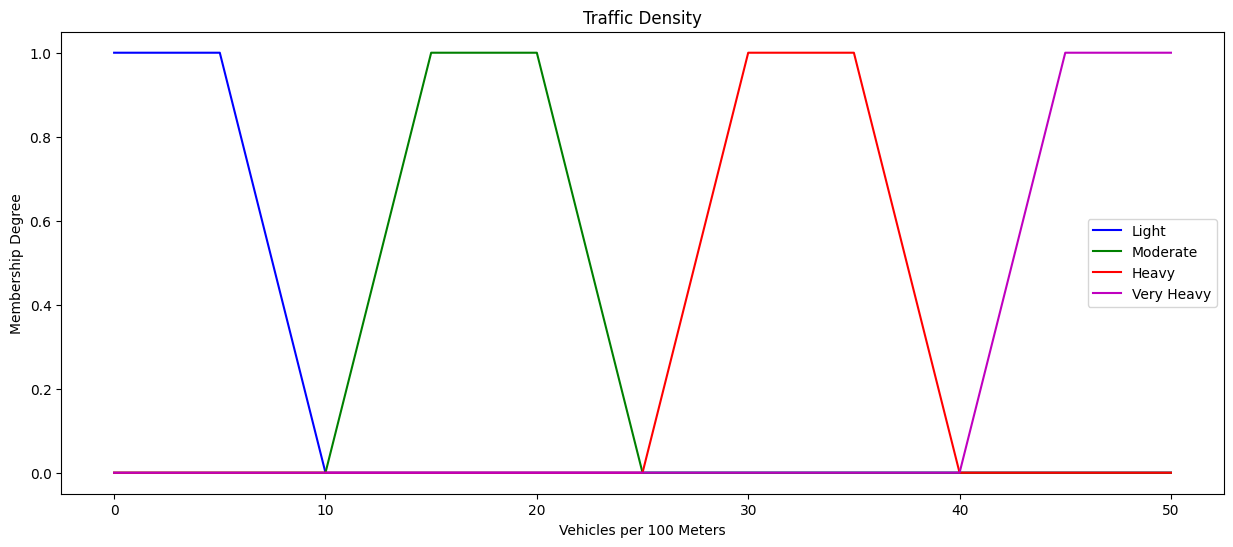

In [51]:
plt.figure(figsize=(15,6))
plt.plot(traffic_density_universe, traffic_light, 'b', label='Light')
plt.plot(traffic_density_universe, traffic_moderate, 'g', label='Moderate')
plt.plot(traffic_density_universe, traffic_heavy, 'r', label='Heavy')
plt.plot(traffic_density_universe, traffic_very_heavy, 'm', label='Very Heavy')
plt.title('Traffic Density')
plt.xlabel('Vehicles per 100 Meters')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

### Driver Speed

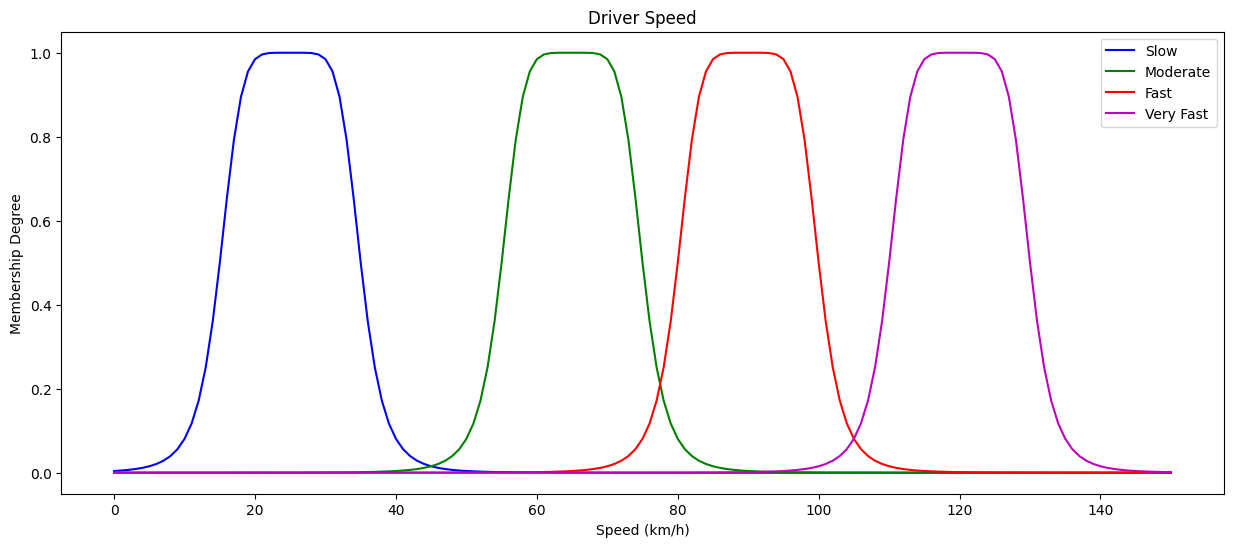

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(driver_speed_universe, speed_slow, 'b', label='Slow')
plt.plot(driver_speed_universe, speed_moderate, 'g', label='Moderate')
plt.plot(driver_speed_universe, speed_fast, 'r', label='Fast')
plt.plot(driver_speed_universe, speed_very_fast, 'm', label='Very Fast')
plt.title('Driver Speed')
plt.xlabel('Speed (km/h)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

### Rainfall Intensity

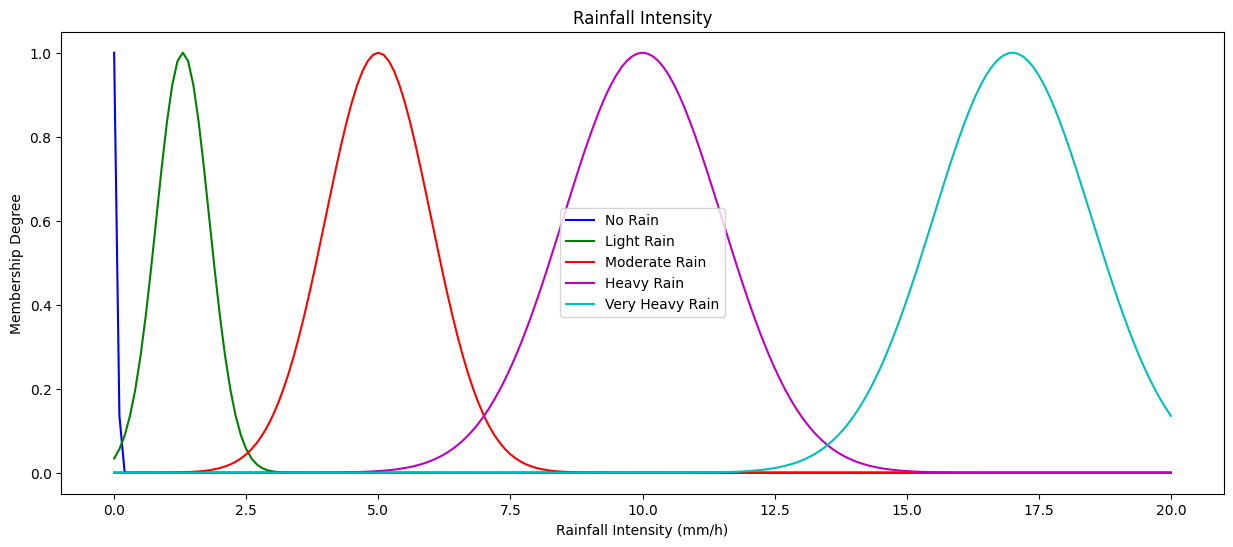

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(rainfall_intensity_universe, rain_no, 'b', label='No Rain')
plt.plot(rainfall_intensity_universe, rain_light, 'g', label='Light Rain')
plt.plot(rainfall_intensity_universe, rain_moderate, 'r', label='Moderate Rain')
plt.plot(rainfall_intensity_universe, rain_heavy, 'm', label='Heavy Rain')
plt.plot(rainfall_intensity_universe, rain_very_heavy, 'c', label='Very Heavy Rain')
plt.title('Rainfall Intensity')
plt.xlabel('Rainfall Intensity (mm/h)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

### Time of Day

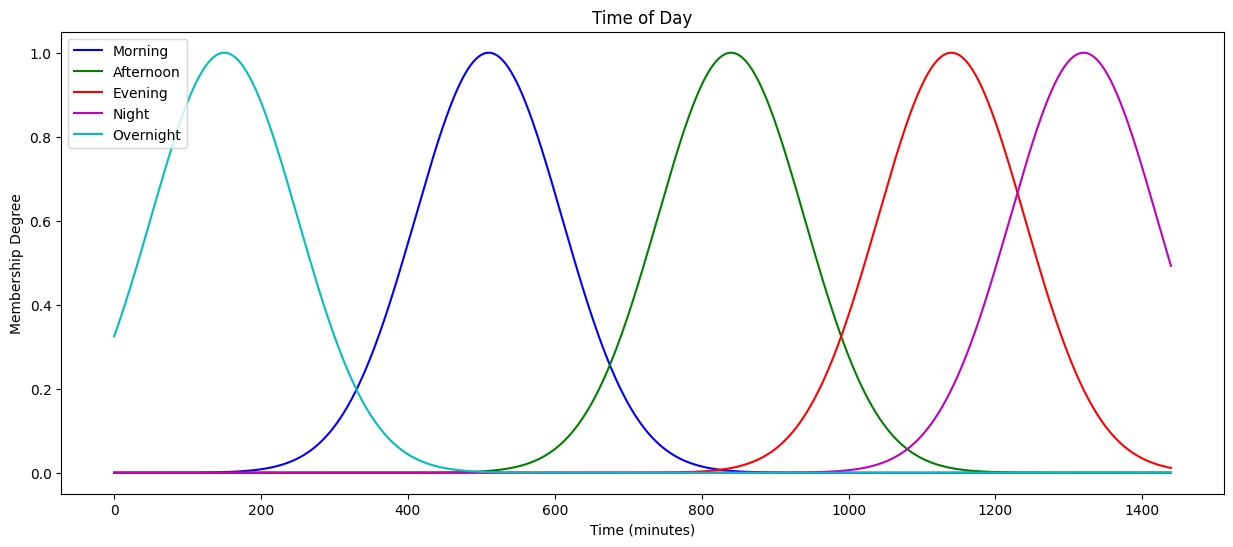

In [54]:
plt.figure(figsize=(15, 6))
plt.plot(time_of_day_universe, time_morning, 'b', label='Morning')
plt.plot(time_of_day_universe, time_afternoon, 'g', label='Afternoon')
plt.plot(time_of_day_universe, time_evening, 'r', label='Evening')
plt.plot(time_of_day_universe, time_night, 'm', label='Night')
plt.plot(time_of_day_universe, time_overnight, 'c', label='Overnight')
plt.title('Time of Day')
plt.xlabel('Time (minutes)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

### Accident Likelihood

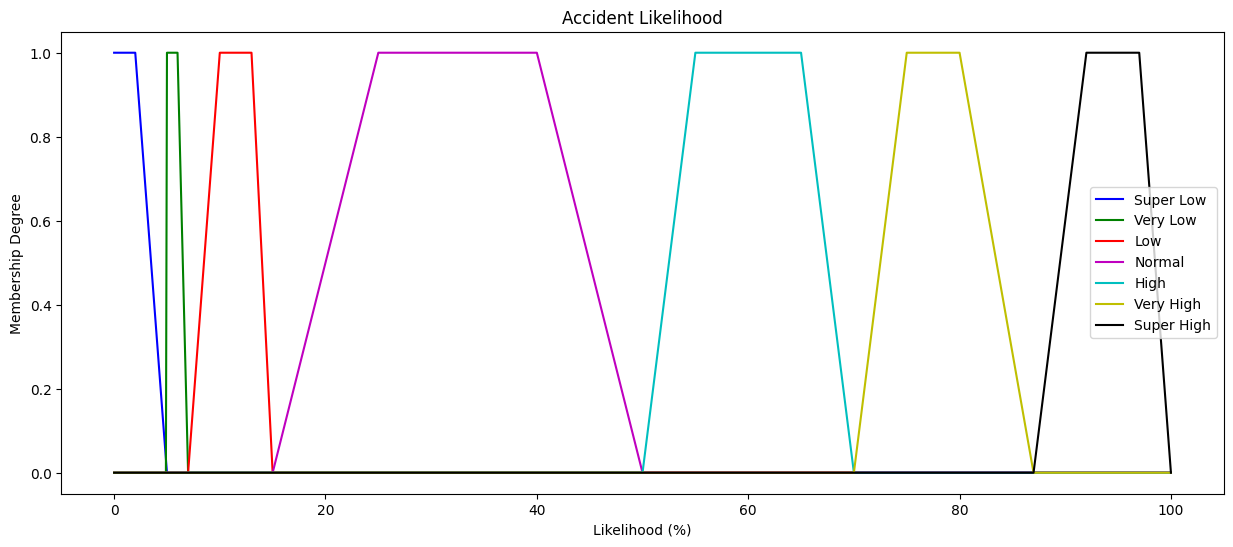

In [55]:
plt.figure(figsize=(15, 6))
plt.plot(accident_likelihood_universe, accident_super_low, 'b', label='Super Low')
plt.plot(accident_likelihood_universe, accident_very_low, 'g', label='Very Low')
plt.plot(accident_likelihood_universe, accident_low, 'r', label='Low')
plt.plot(accident_likelihood_universe, accident_normal, 'm', label='Normal')
plt.plot(accident_likelihood_universe, accident_high, 'c', label='High')
plt.plot(accident_likelihood_universe, accident_very_high, 'y', label='Very High')
plt.plot(accident_likelihood_universe, accident_super_high, 'k', label='Super High')
plt.title('Accident Likelihood')
plt.xlabel('Likelihood (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

## Fuzzy Rules

In [56]:
# Define fuzzy rules
rules = [
    ctrl.Rule(traffic_density['very_heavy'] & driver_speed['very_fast'] & rainfall_intensity['very_heavy'] & time_of_day['night'], accident_likelihood['super_high']),
    ctrl.Rule(traffic_density['heavy'] & driver_speed['fast'] & rainfall_intensity['heavy'] & time_of_day['evening'], accident_likelihood['very_high']),
    ctrl.Rule(traffic_density['moderate'] & driver_speed['fast'] & rainfall_intensity['moderate'] & time_of_day['afternoon'], accident_likelihood['high']),
    ctrl.Rule(traffic_density['light'] & driver_speed['moderate'] & rainfall_intensity['light'] & time_of_day['morning'], accident_likelihood['normal']),
    ctrl.Rule(traffic_density['moderate'] & driver_speed['slow'] & rainfall_intensity['no'] & time_of_day['morning'], accident_likelihood['low']),
    ctrl.Rule(traffic_density['light'] & driver_speed['slow'] & rainfall_intensity['no'] & time_of_day['afternoon'], accident_likelihood['very_low']),
    ctrl.Rule(traffic_density['very_heavy'] & driver_speed['moderate'] & rainfall_intensity['very_heavy'] & time_of_day['overnight'], accident_likelihood['high']),
    ctrl.Rule(traffic_density['heavy'] & driver_speed['fast'] & rainfall_intensity['light'] & time_of_day['evening'], accident_likelihood['normal']),
    ctrl.Rule(traffic_density['moderate'] & driver_speed['fast'] & rainfall_intensity['no'] & time_of_day['night'], accident_likelihood['very_high']),
    ctrl.Rule(traffic_density['light'] & driver_speed['moderate'] & rainfall_intensity['no'] & time_of_day['overnight'], accident_likelihood['super_low']),
]

## Control System and Simulation

In [57]:
# Create control system and simulation
accident_ctrl = ctrl.ControlSystem(rules)
accident_sim = ctrl.ControlSystemSimulation(accident_ctrl)

In [58]:
# Function to categorize input values
def categorize_input(value, universe_data, ignore_index = None):
    if ignore_index == 0 and value == 0:
        return "No Rain"

    for i in range(len(universe_data[0])):
        if universe_data[0][i][0] <= value <= universe_data[0][i][1]:
            return universe_data[1][i]
    
    print(f"Error: Given value is beyond the universe range (Allowed range: {universe_data[0][0][0]} to {universe_data[0][-1][-1]}.)")
    exit(0)

## Test Input Reading
It is read from the file `test_input.txt` which has exactly four lines
1. Traffic density (vehicles/100m).
2. Driver Speed (km/h).
3. Rainfall Intensity (mm/h).
4. Time of day (24hr format hh:mm).

In [59]:
# Read input values from a text file
with open("test_input.txt", "r") as file:
    lines = file.readlines()

# Parse values from the file
traffic_density_value = int(lines[0].strip())            # First line for Traffic Density
driver_speed_value = int(lines[1].strip())               # Second line for Driver Speed
rainfall_intensity_value = float(lines[2].strip())       # Third line for Rainfall Intensity
time_input = lines[3].strip()                            # Fourth line for Time of Day (hh:mm format)

# Convert time to minutes (00:00 - 23:59) format
time_of_day_value = int(time_input.split(':')[0]) * 60 + int(time_input.split(':')[1])

# Categorize each input based on the defined fuzzy membership functions
traffic_category = categorize_input(traffic_density_value, traffic_density_data)
speed_category = categorize_input(driver_speed_value, driver_speed_data)
rain_category = categorize_input(rainfall_intensity_value, rainfall_intensity_data, 0)
time_category = categorize_input(time_of_day_value, time_of_day_data)

# Display categorized inputs
print(f"Traffic Density: {traffic_category}")
print(f"Driver Speed: {speed_category}")
print(f"Rainfall Intensity: {rain_category}")
print(f"Time of Day: {time_category}")

Traffic Density: Light
Driver Speed: Moderate
Rainfall Intensity: Light Rain
Time of Day: Overnight


## Fuzzy Inference and Defuzzification

In [60]:
# Input test values
accident_sim.input['traffic_density'] = traffic_density_value
accident_sim.input['driver_speed'] = driver_speed_value
accident_sim.input['rainfall_intensity'] = rainfall_intensity_value
accident_sim.input['time_of_day'] = time_of_day_value  # Time of day in minutes since midnight

# Perform fuzzy inference and defuzzification
accident_sim.compute()

## Likelihood of acceleration

In [62]:
# Retrieve output and determine category
likelihood_value = accident_sim.output['accident_likelihood']

# Find category based on likelihood percentage
category = categorize_input(likelihood_value, accident_likelihood_data)

print(f"There is {likelihood_value:.2f}% chance of occuring accident ({category}).")

There is 32.50% chance of occuring accident (Medium).


In [63]:
import numpy as np

# Objective function
def objective_function(x):
    return -x**2 + x + 7

# Particle Swarm Optimization parameters
num_particles = 30
num_iterations = 50
w = 0.5  # inertia weight
c1 = 1.5  # cognitive (particle) component
c2 = 1.5  # social (swarm) component

# Initialize particles' positions and velocities
positions = np.random.uniform(-10, 10, num_particles)  # random starting points
velocities = np.zeros(num_particles)

# Initialize personal bests and global best
personal_best_positions = np.copy(positions)
personal_best_scores = objective_function(personal_best_positions)
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

# PSO algorithm
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Update velocity
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (
            w * velocities[i]
            + c1 * r1 * (personal_best_positions[i] - positions[i])
            + c2 * r2 * (global_best_position - positions[i])
        )
        
        # Update position
        positions[i] += velocities[i]

        # Evaluate fitness
        fitness = objective_function(positions[i])

        # Update personal best
        if fitness < personal_best_scores[i]:
            personal_best_positions[i] = positions[i]
            personal_best_scores[i] = fitness

    # Update global best
    min_personal_best_index = np.argmin(personal_best_scores)
    if personal_best_scores[min_personal_best_index] < global_best_score:
        global_best_position = personal_best_positions[min_personal_best_index]
        global_best_score = personal_best_scores[min_personal_best_index]

    # Optional: print progress
    print(f"Iteration {iteration+1}/{num_iterations}, Best Score: {global_best_score}, Best Position: {global_best_position}")

print("\nOptimized minimum found:")
print("x =", global_best_position)
print("f(x) =", global_best_score)


Iteration 1/50, Best Score: -132.5987123849726, Best Position: -11.325764769560259
Iteration 2/50, Best Score: -404.3173767890761, Best Position: -19.787123423222823
Iteration 3/50, Best Score: -696.6484177151565, Best Position: -26.031083990578985
Iteration 4/50, Best Score: -1376.2396820018569, Best Position: -36.695291126725394
Iteration 5/50, Best Score: -2168.4608126171665, Best Position: -46.14451535408173
Iteration 6/50, Best Score: -3953.8490994325502, Best Position: -62.43726320259366
Iteration 7/50, Best Score: -5682.307771753463, Best Position: -74.9291573050731
Iteration 8/50, Best Score: -8155.1490990719685, Best Position: -89.84599658574788
Iteration 9/50, Best Score: -11340.911139428541, Best Position: -106.0277482134516
Iteration 10/50, Best Score: -15787.732765116398, Best Position: -125.17809182636566
Iteration 11/50, Best Score: -19955.627549592184, Best Position: -140.79004759568943
Iteration 12/50, Best Score: -24993.106265407525, Best Position: -157.6150096145446
